In [1]:
import pandas as pd
import bt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import talib

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
country_code = 'USA'

## Alternate Dataset - Inflation Dataset
Data Downloaded from "https://data.worldbank.org/indicator/FR.INR.RINR?locations=US" 
<br/>Loaded into a pandas dataset & Visualize the Inflation of United States over the years

In [4]:
# Inflation Data for all countries
raw_inflation_data = pd.read_excel('./data/country_inflation_data.xls', skiprows=3)
raw_inflation_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)

### Santize the data

In [5]:
# Structure the Data so that it can be interpreted easily
df_inflation_data = pd.melt(raw_inflation_data, id_vars=['Country Code'], var_name="Year", value_name="Inflation")
df_inflation_data.index = df_inflation_data['Country Code']
df_inflation_data['Year'] = df_inflation_data['Year'].astype('int')
df_inflation_data.drop(columns=['Country Code'], inplace=True)
df_inflation_data.dropna(inplace=True)
df_inflation_data.tail(5)

,Year,Inflation
Country Code,,
VNM,2021,1.834716
WLD,2021,3.423629
WSM,2021,3.133205
XKX,2021,3.353691
ZAF,2021,4.611672


### Plot of US Inflation Over the Years

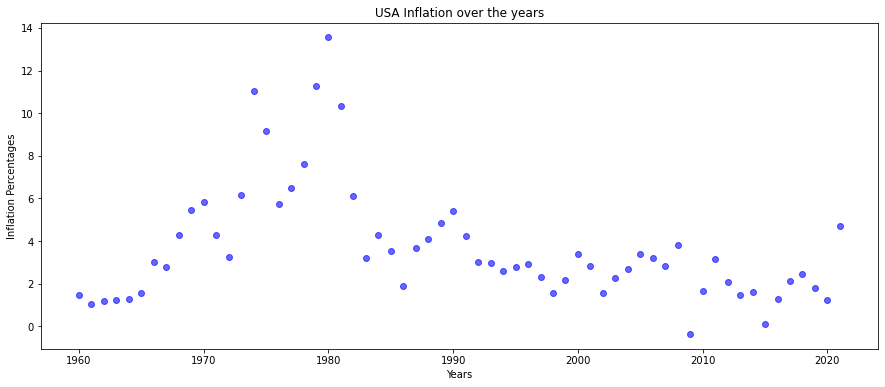

In [6]:
plt.figure(figsize=(15,6))
usa_inflation_data = df_inflation_data.loc[country_code][['Year','Inflation']]
plt.title("USA Inflation over the years")
plt.xlabel('Years')
plt.ylabel('Inflation Percentages')
plt.scatter(data=usa_inflation_data, x='Year', y='Inflation', color='blue', alpha=0.6)
plt.show()


## Interest Rates Dataset
How has the Federal Reserve responded to the Inflationary Pressures?<br/>
It can come evident from the interest rate dataset.<br/>
Loading the interest rate database and visually Ploting them<br/>
Data Downloaded from https://data.worldbank.org/indicator/FR.INR.RINR?locations=US


In [7]:
# Inflation Data for all countries
raw_interest_data = pd.read_excel('./data/country_interest_rates.xls', skiprows=3)
raw_interest_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)

### Santize the data

In [8]:
# Structure the Data so that it can be interpreted easily
df_interest_data = pd.melt(raw_interest_data, id_vars=['Country Code'], var_name="Year", value_name="InterestRates")
df_interest_data.index = df_interest_data['Country Code']
df_interest_data['Year'] = df_interest_data['Year'].astype('int')
df_interest_data.drop(columns=['Country Code'], inplace=True)
df_interest_data.dropna(inplace=True)
df_interest_data.tail(5)

,Year,InterestRates
Country Code,,
VUT,2020,0.277822
WSM,2020,8.471778
ZAF,2020,2.313127
ZMB,2020,-3.749081
ZWE,2020,-79.803157


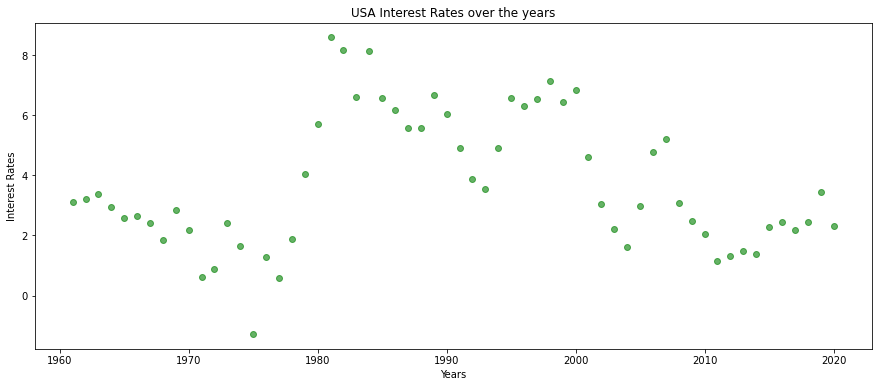

In [9]:
# Inflation Data for USA
plt.figure(figsize=(15,6))
usa_interest_data = df_interest_data.loc[country_code][['Year','InterestRates']]
plt.title("USA Interest Rates over the years")
plt.xlabel('Years')
plt.ylabel('Interest Rates')
plt.scatter(data=usa_interest_data, x='Year', y='InterestRates', color='green', alpha=0.6)
plt.show()


### Merge Inflation and Interest Rate Datasets 
Merging interest rates and inflation data in to a single dataframe so that we can fetch the correlation

In [10]:
usa_inflation_interest_df = pd.merge(usa_inflation_data, usa_interest_data, on=["Year"])
usa_inflation_interest_df.index = usa_inflation_interest_df['Year']
usa_inflation_interest_df['Interest_Rate_Next_Year'] = usa_inflation_interest_df["Year"].apply(lambda x: (usa_inflation_interest_df.loc[x+1]["InterestRates"]) if x < 2020 else 0.0)
usa_inflation_interest_df = usa_inflation_interest_df.drop(columns=['Year'])
usa_inflation_interest_df['Interest_Rate_Next_Year'] = usa_inflation_interest_df['Interest_Rate_Next_Year'].astype("float")
usa_inflation_interest_df.tail(5)


,Inflation,InterestRates,Interest_Rate_Next_Year
Year,,,
2016,1.261583,2.436851,2.175694
2017,2.130110,2.175694,2.444494
2018,2.442583,2.444494,3.436010
2019,1.812210,3.436010,2.311111
2020,1.233584,2.311111,0.000000


In [11]:
inflation_interest_correlation = usa_inflation_interest_df.corr(method='pearson')
inflation_interest_correlation

,Inflation,InterestRates,Interest_Rate_Next_Year
Inflation,1.000000,0.076389,0.179262
InterestRates,0.076389,1.000000,0.856736
Interest_Rate_Next_Year,0.179262,0.856736,1.000000


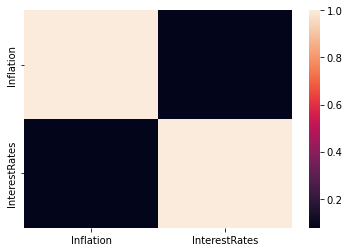

In [12]:
# Plot the heatmap signifying the correlation between Inflation & Interest Rates
sns.heatmap(usa_inflation_interest_df[['Inflation', 'InterestRates']].corr())
plt.show()

### Correlation between interest rates and inflation

We don't see a  string correlation between interest rates and inflation and infact we see some cases same side movement and in some cases an opposite movement as depicted in the graph below

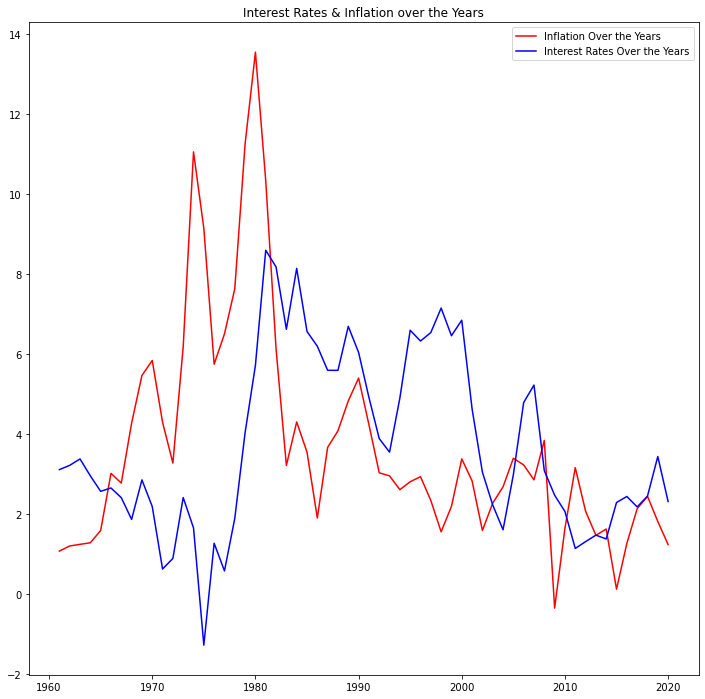

In [13]:
plt.figure(figsize=(12,12))
plt.plot(usa_inflation_interest_df['Inflation'], color='red', label='Inflation Over the Years')
plt.plot(usa_inflation_interest_df['InterestRates'], color='blue', label='Interest Rates Over the Years')
plt.title("Interest Rates & Inflation over the Years")
plt.legend()
plt.show()

In [14]:
# Top 5 Stocks
raw_stocks_data = pd.read_excel('./data/sp500_historic_data.xlsx')
usa_inflation_interest_df = pd.merge(usa_inflation_interest_df, raw_stocks_data, on=["Year"])
usa_inflation_interest_df.head(10)

,Year,Inflation,InterestRates,Interest_Rate_Next_Year,Top5
0,1970,5.838255,2.185400,0.622605,"ibm,xom"
1,1971,4.292767,0.622605,0.887229,"ibm,xom"
2,1972,3.272278,0.887229,2.409735,"ibm,xom"
3,1973,6.177760,2.409735,1.651064,"ibm,xom"
4,1974,11.054805,1.651064,-1.281419,"ibm,xom"
5,1975,9.143147,-1.281419,1.266892,"ibm,xom"
6,1976,5.744813,1.266892,0.575069,"ibm,xom"
7,1977,6.501684,0.575069,1.889903,"ibm,xom"
8,1978,7.630964,1.889903,4.034548,"ibm,xom"
9,1979,11.254471,4.034548,5.716390,"ibm,xom"


## Constants

In [15]:
index_tickers = '^GSPC, ^IXIC'
index_ticker_column_mapper = {'gspc': 'SP500', 'ixic': 'Nasdaq'}
target_inflation_metric = '7'
start_date = '1970-01-01'

## Indexes Investment Strategy
### Allocating portfolio across S&P 500, Nasdaq companies

S&P 500 - Top 500 Companies in US Markets launched in 1923 tracking 90 stocks, expanded to 500 stocks from 1957


In [16]:
def fetch_price_data(tickers, start_date):
    raw_price_data = bt.get(tickers, start = start_date)
    return raw_price_data

def fetch_price_data_range(tickers, start_date, end_date):
    raw_price_data = bt.get(tickers, start = start_date, end=end_date)
    return raw_price_data

In [17]:
# Price Data for the two indices SP500 &Rusell 3000 index.
price_data = fetch_price_data(index_tickers, start_date)
price_data.rename(columns = index_ticker_column_mapper, inplace=True)
price_data.head()

,SP500,Nasdaq
Date,,
1971-02-05,96.930000,100.000000
1971-02-08,97.449997,100.839996
1971-02-09,97.510002,100.760002
1971-02-10,97.389999,100.690002
1971-02-11,97.910004,101.449997


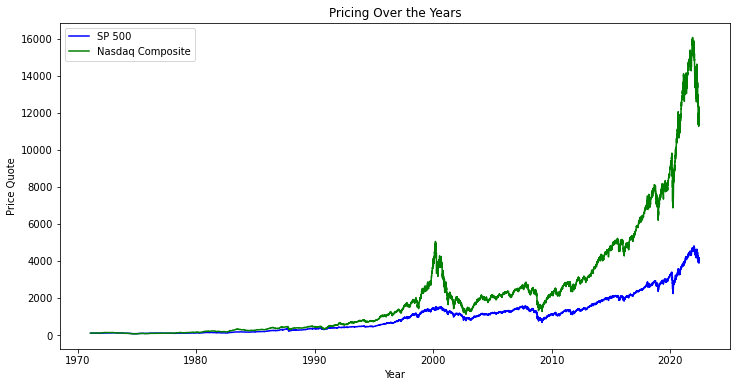

In [18]:
# Plot Price Data
plt.figure(figsize=(12,6))
plt.xlabel("Year")
plt.ylabel("Price Quote")
plt.title('Pricing Over the Years')
plt.plot(price_data['SP500'], color='blue', label='SP 500')
plt.plot(price_data['Nasdaq'], color='green', label='Nasdaq Composite')
plt.legend()
plt.show()

### Merge Inflation, Interest Rates data with SP500 and Nasdaq Pricing Data

In [19]:
price_data['year'] = pd.DatetimeIndex(price_data.index).year
year_wise_df = price_data.groupby(by='year').agg(
    {'SP500' : 'mean', 'Nasdaq': 'mean'})
year_wise_df['Year'] = year_wise_df.index
year_wise_df = pd.merge(usa_inflation_interest_df, 
                        year_wise_df, 
                        on=["Year"])

In [20]:
year_wise_df.head()

,Year,Inflation,InterestRates,Interest_Rate_Next_Year,Top5,SP500,Nasdaq
0,1971,4.292767,0.622605,0.887229,"ibm,xom",98.767555,107.439301
1,1972,3.272278,0.887229,2.409735,"ibm,xom",109.134821,128.526613
2,1973,6.177760,2.409735,1.651064,"ibm,xom",107.438413,109.952857
3,1974,11.054805,1.651064,-1.281419,"ibm,xom",82.780909,76.286877
4,1975,9.143147,-1.281419,1.266892,"ibm,xom",86.181225,77.203952


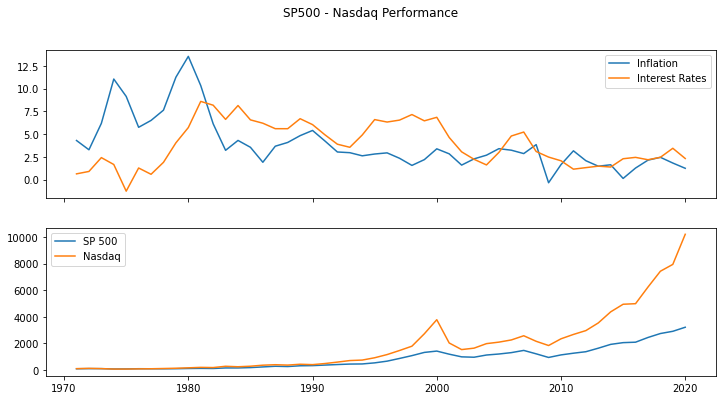

In [21]:
fig, axs = plt.subplots(2, figsize=(12,6))
fig.figsize = (24,25)
fig.suptitle('SP500 - Nasdaq Performance')
axs[1].plot(year_wise_df['Year'], year_wise_df['SP500'], label='SP 500')
axs[1].plot(year_wise_df['Year'], year_wise_df['Nasdaq'], label='Nasdaq')
axs[1].legend()
axs[0].plot(year_wise_df['Year'], year_wise_df['Inflation'], label = 'Inflation')
axs[0].plot(year_wise_df['Year'], year_wise_df['InterestRates'], label='Interest Rates')
axs[0].legend()

for ax in fig.get_axes():
    ax.label_outer()
plt.show()

##### Graph Inference

From the Graphs, we see a strong correlation with interest rates, inflation along 
the stock market movement. We can do a prediction of stock market direction infering
from the inflation and interest rates movement.

### Trading Strategies

#### Equal Weight Strategy

We have our bt algos to run monthly and select all indices and weighing equally

In [22]:
equal_weight_strategy = bt.Strategy('Equal_Weight',
                            [
                              bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()
                            ])

In [23]:
inverse_volatility_strategy = bt.Strategy('Inverse_Volatility',
                            [
                              bt.algos.RunWeekly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighInvVol(),
                              bt.algos.Rebalance()
                            ])

In [24]:
top5_strategy = bt.Strategy('Top5',
                            [
                              bt.algos.RunWeekly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighInvVol(),
                              bt.algos.Rebalance()
                            ])

In [25]:
strategy_lst = [equal_weight_strategy, inverse_volatility_strategy, top5_strategy]

## Interest Rate Based Trading Strategy

In [26]:
def interest_based_strategy_computation(strategies, target_interest_metric = -1):
    
    # Initialize empty lists
    lst_interest = []
    lst_year = []
    lst_cagr = []
    lst_sharpe = []
    lst_sortino = []
    lst_strategy = []

    for bt_strategy in strategies:
        target_year_list = []
        if target_interest_metric == -1:
            target_year_list = range(1989, 2020)
        else:   
            interest_from, interest_to = int(target_interest_metric), round(target_interest_metric)
            if(interest_from == interest_to):
                interest_to = interest_from + 1

            # Target Years Based on the Interest Rates
            target_years = year_wise_df[year_wise_df['InterestRates'].between(interest_from, interest_to)][
                'Year'].sort_values(ascending=False)
            target_year_list = target_years.to_list()

        # Run a loop across target
        for yr in target_years:
            start_date = str(yr) + '-01-01'
            end_date = str((yr+1)) + '-01-01'
            try:
                if (bt_strategy.name == 'Top5'):
                    top5codes = usa_inflation_interest_df[usa_inflation_interest_df['Year']==yr]['Top5'].to_string(index=False)
                    price_data = bt.get(top5codes, start=start_date, end=end_date)
                else:
                    price_data = fetch_price_data_range(index_tickers, start_date, end_date)

                bt_backtest = bt.Backtest(bt_strategy, price_data)
                bt_res = bt.run(bt_backtest)

                #bt_res.plot(title=bt_strategy.name)
                #plt.show()

                bt_stats = bt_res.stats
                lst_interest.append(target_interest_metric)
                lst_strategy.append(bt_strategy.name)
                lst_year.append(yr)
                lst_cagr.append(round(bt_stats.loc['cagr'][bt_strategy.name] * 100, 2))
                lst_sharpe.append(round(bt_stats.loc['daily_sharpe'][bt_strategy.name], 2))
                lst_sortino.append(round(bt_stats.loc['daily_sortino'][bt_strategy.name], 2))
            except:
                break
                print('Error ', yr, ' - ', bt_strategy.name)

    return pd.DataFrame(list(zip(lst_interest, lst_strategy, lst_year, lst_cagr, lst_sharpe, lst_sortino)), columns=['Interest Rate', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])


In [27]:
def interest_rate_stock_parameters():
    interest_strategy_df = pd.DataFrame(columns=['Interest Rate', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])
    for item in range(1, 12):
        df2 = interest_based_strategy_computation(strategy_lst, item)
        interest_strategy_df = pd.concat([interest_strategy_df, df2])
    interest_strategy_df = interest_strategy_df.reset_index()
    interest_rate_stock_analysis_df = pd.pivot_table(interest_strategy_df, values=['cagr', 'sharpe', 'sortino'], index=['Interest Rate', 'strategy_name'],
                        aggfunc={'cagr': np.mean,
                                 'sharpe': np.mean,
                                 'sortino': np.mean
                                }).reset_index()
    return interest_rate_stock_analysis_df



In [28]:
def plot_heatmap(dataframe, index_vars, values, plttitle, aggfn=np.mean, ):
    pvt = pd.pivot_table(dataframe, index=index_vars,
                    values=values, aggfunc=np.mean)
    # Plot CAGR Pivot Table
    plt.figure(figsize=(12,5))
    plt.title(plttitle)
    sns.heatmap(pvt, cmap="RdBu")
    plt.show()

In [29]:
interest_rate_stock_analysis_df = interest_rate_stock_parameters()
# Strategy Based Dataframe
equal_weight_strategy_df = interest_rate_stock_analysis_df[interest_rate_stock_analysis_df['strategy_name'] == 'Equal_Weight']
inverse_volatility_strategy_df = interest_rate_stock_analysis_df[interest_rate_stock_analysis_df['strategy_name'] == 'Inverse_Volatility']
top5_strategy_df = interest_rate_stock_analysis_df[interest_rate_stock_analysis_df['strategy_name'] == 'Top5']

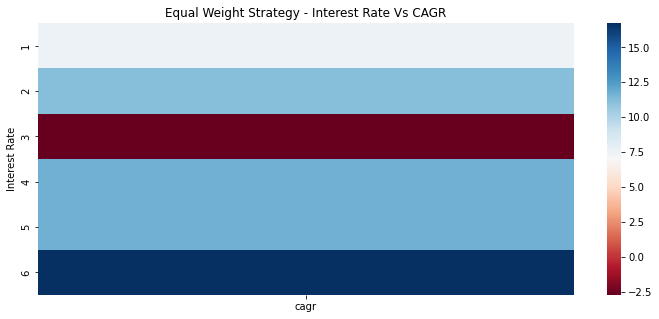

In [30]:
plot_heatmap(equal_weight_strategy_df, ['Interest Rate'], ['cagr'], 'Equal Weight Strategy - Interest Rate Vs CAGR')

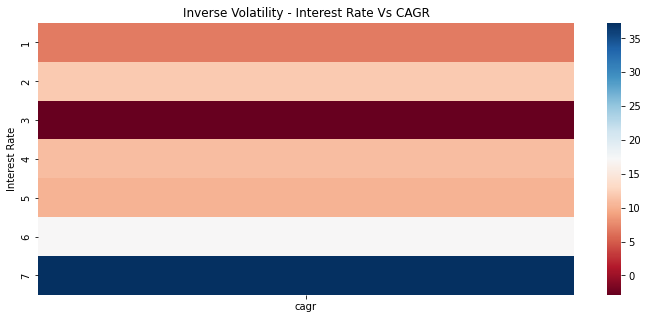

In [31]:
plot_heatmap(inverse_volatility_strategy_df, ['Interest Rate'], ['cagr'], 'Inverse Volatility - Interest Rate Vs CAGR')

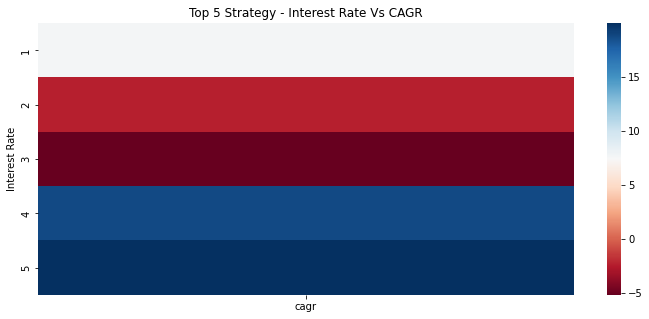

In [32]:
plot_heatmap(top5_strategy_df, ['Interest Rate'], ['cagr'], 'Top 5 Strategy - Interest Rate Vs CAGR')

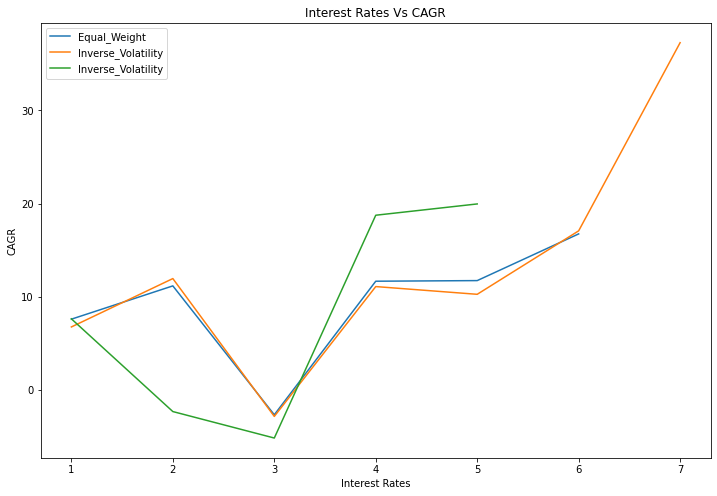

In [33]:
plt.figure(figsize=(12,8))
plt.plot(equal_weight_strategy_df['Interest Rate'], 
         equal_weight_strategy_df['cagr'], 
         label='Equal_Weight')
plt.plot(inverse_volatility_strategy_df['Interest Rate'], 
         inverse_volatility_strategy_df['cagr'], 
         label='Inverse_Volatility')
plt.plot(top5_strategy_df['Interest Rate'], 
         top5_strategy_df['cagr'], 
         label='Inverse_Volatility')
plt.xlabel('Interest Rates')
plt.ylabel('CAGR')
plt.title('Interest Rates Vs CAGR')
plt.legend()
plt.show()

### Inflation Based Trading Strategy

In [34]:
def inflation_based_strategy_computation(strategies, target_inflation_metric = -1):
    
    if target_inflation_metric == 8:
        # We don't have data Inflation @ 8. 
        # Inflation 9 - unique data case so letz set inflation metric to 10
        target_inflation_metric = 10
    
    # Initialize empty lists
    lst_inflation = []
    lst_year = []
    lst_cagr = []
    lst_sharpe = []
    lst_sortino = []
    lst_strategy = []

    for bt_strategy in strategies:
        
        target_year_list = []
        if target_inflation_metric == -1:
            target_year_list = range(1972, 2022)
        else:
            inflation_from, inflation_to = int(target_inflation_metric), round(target_inflation_metric)
            if(inflation_from == inflation_to):
                inflation_to = inflation_from + 1

            # Target Years Based on the Interest Rates
            target_years = year_wise_df[year_wise_df['Inflation'].between(inflation_from, inflation_to)][
                'Year'].sort_values(ascending=False)
            target_year_list = target_years.to_list()
        

        # Run a loop across target
        for yr in target_years:
            start_date = str(yr) + '-01-01'
            end_date = str((yr+1)) + '-01-01'
            
            try:
                            
                if (bt_strategy.name == 'Top5'):
                    tickers = usa_inflation_interest_df[usa_inflation_interest_df['Year']==yr]['Top5'].to_string(index=False)
                    price_data = bt.get(tickers, start=start_date, end=end_date)
                else:
                    price_data = fetch_price_data_range(index_tickers, start_date, end_date)

                bt_backtest = bt.Backtest(bt_strategy, price_data)
                bt_res = bt.run(bt_backtest)

                #bt_res.plot(title="Index Equal Weight Strategy")
                #plt.show()

                bt_stats = bt_res.stats
                lst_inflation.append(target_inflation_metric)
                lst_strategy.append(bt_strategy.name)


                lst_year.append(yr)
                lst_cagr.append(round(bt_stats.loc['cagr'][bt_strategy.name] * 100, 2))
                lst_sharpe.append(round(bt_stats.loc['daily_sharpe'][bt_strategy.name], 2))
                lst_sortino.append(round(bt_stats.loc['daily_sortino'][bt_strategy.name], 2))
            
            except:
                print('Error ', yr, ' - ', bt_strategy.name)

    return pd.DataFrame(list(zip(lst_inflation, lst_strategy, lst_year, lst_cagr, lst_sharpe, lst_sortino)),
                     columns=['Inflation', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])


In [35]:
def inflation_rate_stock_parameters():
    inflation_strategy_df = pd.DataFrame(columns=['Inflation', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])
    for item in range(1, 12):
        df2 = inflation_based_strategy_computation(strategy_lst, item)
        inflation_strategy_df = pd.concat([inflation_strategy_df, df2])
    # Inflation Strategy Dataframe
    inflation_strategy_df = pd.pivot_table(inflation_strategy_df, values=['cagr', 'sharpe', 'sortino'], index=['Inflation', 'strategy_name'],
                    aggfunc={'cagr': np.mean,
                             'sharpe': np.mean,
                             'sortino': np.mean
                            }).reset_index()
    return inflation_strategy_df


In [36]:
inflation_rate_stock_analysis_df = inflation_rate_stock_parameters()

equal_weight_strategy_df = inflation_rate_stock_analysis_df[inflation_rate_stock_analysis_df['strategy_name'] == 'Equal_Weight']
inverse_volatility_strategy_df = inflation_rate_stock_analysis_df[inflation_rate_stock_analysis_df['strategy_name'] == 'Inverse_Volatility']
top5_strategy_df = inflation_rate_stock_analysis_df[inflation_rate_stock_analysis_df['strategy_name'] == 'Top5']


Error  1996  -  Top5
Error  1983  -  Top5


In [37]:
inflation_rate_stock_analysis_df

,Inflation,strategy_name,cagr,sharpe,sortino
0,1,Equal_Weight,15.854444,1.035556,1.617778
1,1,Inverse_Volatility,16.646667,1.095556,1.714444
2,1,Top5,8.174444,0.568889,0.981111
3,2,Equal_Weight,16.365385,1.172308,1.989231
4,2,Inverse_Volatility,14.263846,1.103846,1.880000
5,2,Top5,12.870833,0.769167,1.390833
6,3,Equal_Weight,2.220000,0.739000,1.385000
7,3,Inverse_Volatility,1.654000,0.694000,1.313000
8,3,Top5,7.154444,0.605556,1.117778
9,4,Equal_Weight,16.710000,1.272000,2.080000


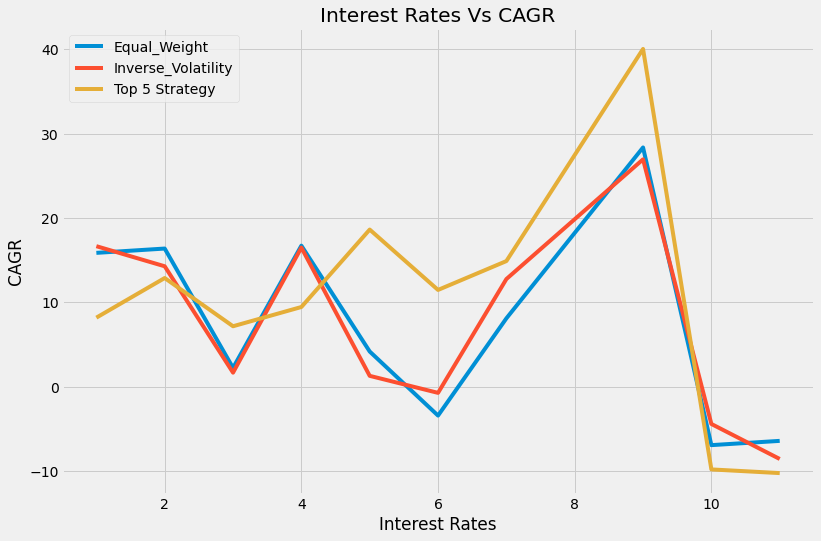

In [38]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,8))
    plt.plot(equal_weight_strategy_df['Inflation'], 
             equal_weight_strategy_df['cagr'], 
             label='Equal_Weight')
    plt.plot(inverse_volatility_strategy_df['Inflation'], 
             inverse_volatility_strategy_df['cagr'], 
             label='Inverse_Volatility')
    plt.plot(top5_strategy_df['Inflation'], 
             top5_strategy_df['cagr'], 
             label='Top 5 Strategy')
    plt.xlabel('Interest Rates')
    plt.ylabel('CAGR')
    plt.title('Interest Rates Vs CAGR')
    plt.legend()
plt.show()

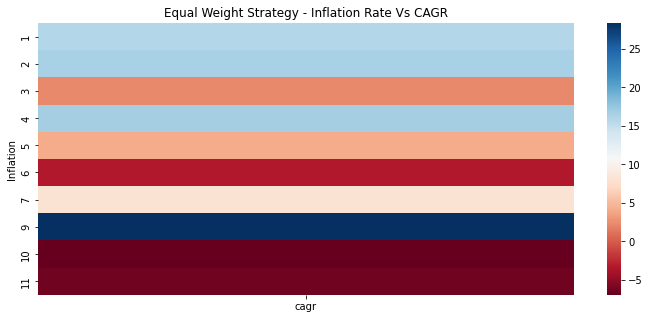

In [39]:
plot_heatmap(equal_weight_strategy_df, ['Inflation'], ['cagr'], 'Equal Weight Strategy - Inflation Rate Vs CAGR')


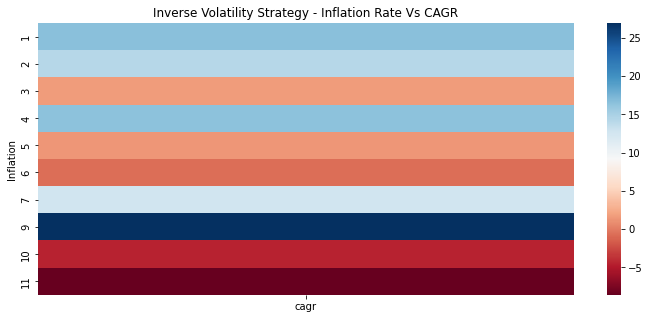

In [40]:
plot_heatmap(inverse_volatility_strategy_df, ['Inflation'], ['cagr'], 'Inverse Volatility Strategy - Inflation Rate Vs CAGR')


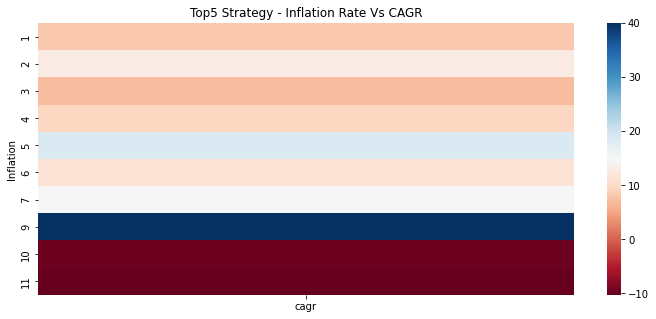

In [41]:
plot_heatmap(top5_strategy_df, ['Inflation'], ['cagr'], 'Top5 Strategy - Inflation Rate Vs CAGR')


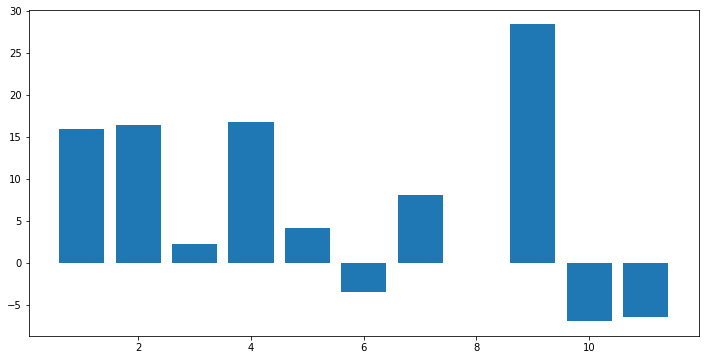

In [42]:
plt.figure(figsize=(12,6))
plt.bar(equal_weight_strategy_df['Inflation'], 
        equal_weight_strategy_df['cagr'])
plt.show()

## Overall Market Stats

In [43]:
# Daily Price Data for Index Tickers
daily_price_data = bt.get(index_tickers, start = start_date)
# Yearly Price Data for Index Tickers
yearly_price_data = daily_price_data.resample("y").mean()
yearly_price_data.head(5)

,SP500,Nasdaq,year
Date,,,
1971-12-31,98.767555,107.439301,1971.0
1972-12-31,109.134821,128.526613,1972.0
1973-12-31,107.438413,109.952857,1973.0
1974-12-31,82.780909,76.286877,1974.0
1975-12-31,86.181225,77.203952,1975.0


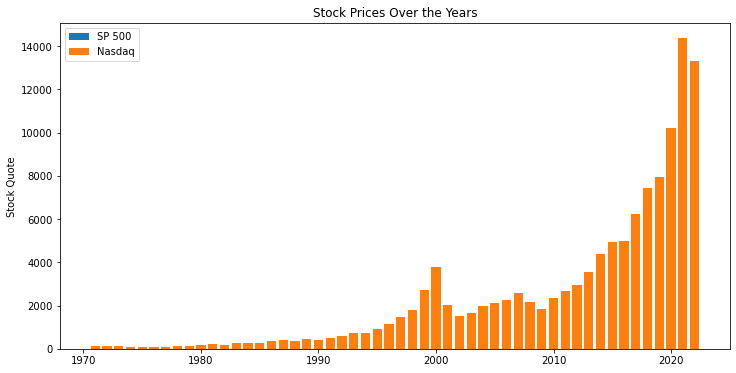

In [44]:
plt.figure(figsize=(12,6))
plt.bar(yearly_price_data['year'], 
        yearly_price_data['SP500'],
        label="SP 500")
plt.bar(yearly_price_data['year'], 
        yearly_price_data['Nasdaq'],
        label="Nasdaq")
plt.title("Stock Prices Over the Years")
plt.ylabel("Stock Quote")
plt.legend()
plt.show()

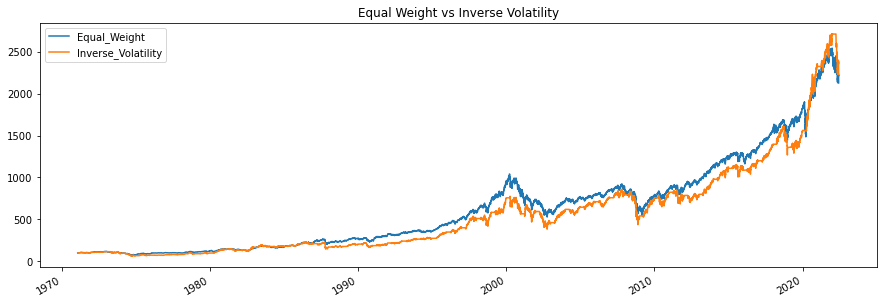

In [46]:
### Applying Strategies over complete Market Data
bt_backtest_equal = bt.Backtest(strategy_lst[0], price_data)
bt_backtest_inv = bt.Backtest(strategy_lst[1], price_data)
bt_top5 = bt.Backtest(strategy_lst[2], price_data)


bt_results = bt.run(bt_backtest_equal, bt_backtest_inv)

bt_results.plot(title="Equal Weight vs Inverse Volatility")

plt.show()

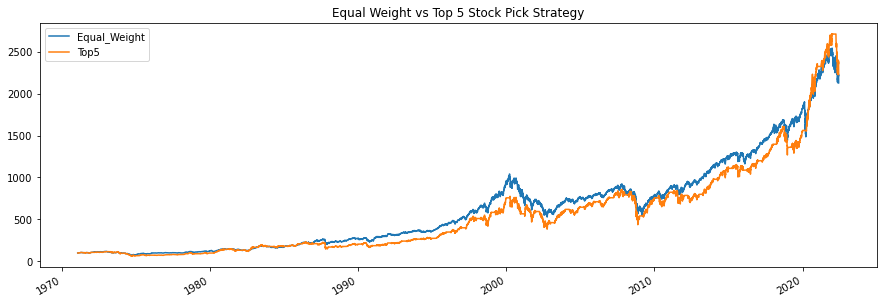

In [48]:
### Applying Strategies over complete Market Data
bt_results = bt.run(bt_backtest_equal, bt_top5)

bt_results.plot(title="Equal Weight vs Top 5 Stock Pick Strategy")

plt.show()